In [ ]:
pip install sastrawi

In [ ]:
pip install networkx

In [ ]:
import pandas as pd
import re
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import nltk
from nltk.corpus import stopwords
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
import networkx as nx
import matplotlib.pyplot as plt
from networkx.classes.function import set_node_attributes
import operator

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Praporses Data**

**Menggabungkan Data**

In [ ]:
tweet1 = pd.read_csv('/content/drive/MyDrive/2. Twitter scraping/Kumpulan Data/29042022M.csv')
tweet2 = pd.read_csv('/content/drive/MyDrive/2. Twitter scraping/Kumpulan Data/30042022M.csv')
tweet3 = pd.read_csv('/content/drive/MyDrive/2. Twitter scraping/Kumpulan Data/01052022M.csv')
tweet4 = pd.read_csv('/content/drive/MyDrive/2. Twitter scraping/Kumpulan Data/02052022M.csv')
tweet5 = pd.read_csv('/content/drive/MyDrive/2. Twitter scraping/Kumpulan Data/03052022M.csv')
tweet6 = pd.read_csv('/content/drive/MyDrive/2. Twitter scraping/Kumpulan Data/04052022M.csv')
tweet7 = pd.read_csv('/content/drive/MyDrive/2. Twitter scraping/Kumpulan Data/05052022M.csv')
tweet8 = pd.read_csv('/content/drive/MyDrive/2. Twitter scraping/Kumpulan Data/06052022M.csv')
tweet9 = pd.read_csv('/content/drive/MyDrive/2. Twitter scraping/Kumpulan Data/30042022S.csv')
tweet10 = pd.read_csv('/content/drive/MyDrive/2. Twitter scraping/Kumpulan Data/01052022S.csv')
tweet11 = pd.read_csv('/content/drive/MyDrive/2. Twitter scraping/Kumpulan Data/02052022S.csv')
tweet12 = pd.read_csv('/content/drive/MyDrive/2. Twitter scraping/Kumpulan Data/03052022S.csv')
tweet13 = pd.read_csv('/content/drive/MyDrive/2. Twitter scraping/Kumpulan Data/04052022S.csv')
tweet14 = pd.read_csv('/content/drive/MyDrive/2. Twitter scraping/Kumpulan Data/05052022S.csv')
tweet15 = pd.read_csv('/content/drive/MyDrive/2. Twitter scraping/Kumpulan Data/06052022S.csv')
tweet = pd.concat([tweet1, tweet2, tweet3, tweet4, tweet5, tweet6, tweet7, tweet8,
                   tweet9, tweet10, tweet11, tweet12, tweet13, tweet14, tweet15])
tweet.shape

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (17) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


(267531, 90)

In [ ]:
tweet.head()

,user_id,status_id,created_at,screen_name,text,source,display_text_width,reply_to_status_id,reply_to_user_id,reply_to_screen_name,...,statuses_count,favourites_count,account_created_at,verified,profile_url,profile_expanded_url,account_lang,profile_banner_url,profile_background_url,profile_image_url
0,x1413381682502066180,x1520062251319046144,2022-04-29 15:27:36,kejutam,@kkomu18 @lets_winwing ditunggu mudik nya ke B...,Twitter for Android,41,x1519998398107029504,x1248366359659950081,kkomu18,...,7612,2757,2021-07-09 06:17:41,False,NaN,NaN,NaN,https://pbs.twimg.com/profile_banners/14133816...,NaN,http://pbs.twimg.com/profile_images/1486307564...
1,x1429810270898049030,x1520062247283806209,2022-04-29 15:27:35,Gajah_Mada01,"Mudik Aman,lancar dan gembira serta kembali ke...",Twitter Web App,140,NaN,NaN,NaN,...,4105,382,2021-08-23 14:18:43,False,NaN,NaN,NaN,https://pbs.twimg.com/profile_banners/14298102...,NaN,http://pbs.twimg.com/profile_images/1512836855...
2,x1429810270898049030,x1520046431884955648,2022-04-29 14:24:45,Gajah_Mada01,Menkominfo berharap masyarakat yang mudik untu...,Twitter Web App,261,NaN,NaN,NaN,...,4105,382,2021-08-23 14:18:43,False,NaN,NaN,NaN,https://pbs.twimg.com/profile_banners/14298102...,NaN,http://pbs.twimg.com/profile_images/1512836855...
3,x1429810270898049030,x1520051249193709570,2022-04-29 14:43:53,Gajah_Mada01,Menkominfo hari ini melepas 180 sivitas yang m...,Twitter Web App,267,NaN,NaN,NaN,...,4105,382,2021-08-23 14:18:43,False,NaN,NaN,NaN,https://pbs.twimg.com/profile_banners/14298102...,NaN,http://pbs.twimg.com/profile_images/1512836855...
4,x818341300797722624,x1519964545225469953,2022-04-29 08:59:21,PoldaJogja,"""Di mana dalam perayaan Idul Fitri tahun 2022,...",Twitter Web App,173,x1519964424031051776,x818341300797722624,PoldaJogja,...,25267,1524,2017-01-09 06:19:04,True,https://t.co/LprIXBfvjo,http://jogja.polri.go.id,NaN,https://pbs.twimg.com/profile_banners/81834130...,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/1513486643...


**Menghapus data berulang berdasarkan kolom status_id**

In [ ]:
tweet = tweet.drop_duplicates(subset = 'status_id')
tweet.shape

(156059, 90)

In [ ]:
text_tweet = tweet['text']
text_tweet.head()

0    @kkomu18 @lets_winwing ditunggu mudik nya ke B...
1    Mudik Aman,lancar dan gembira serta kembali ke...
2    Menkominfo berharap masyarakat yang mudik untu...
3    Menkominfo hari ini melepas 180 sivitas yang m...
4    "Di mana dalam perayaan Idul Fitri tahun 2022,...
Name: text, dtype: object

**Case Folding, , Penghapusan Angka, Tanda Baca, dan Spasi berlebih**

In [ ]:
def tweetCleaning(kalimat):
  kalimat = str(kalimat).lower()
  kalimat = re.sub('<.*?>', ' ', kalimat)
  kalimat = re.sub("(@[A-Za-z0-9_]+)|(#[A-Za-z0-9_]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|([0-9]+)"," ", kalimat)
  kalimat = re.sub('[^0-9A-Za-z \t]',' ', kalimat) 
  kalimat = re.sub('\w+:\/\/\S+', ' ', kalimat) 
  kalimat = re.sub('[0-9]+', ' ', kalimat)
  kalimat = re.sub(' +', ' ', kalimat)
  if kalimat[0] is ' ':
    kalimat = kalimat[1:]
  return kalimat

In [ ]:
text_tweet = text_tweet.apply(tweetCleaning)

In [ ]:
text_tweet.head()

0            ditunggu mudik nya ke bantul capres kita 
1    mudik aman lancar dan gembira serta kembali ke...
2    menkominfo berharap masyarakat yang mudik untu...
3    menkominfo hari ini melepas sivitas yang mengi...
4    di mana dalam perayaan idul fitri tahun pemeri...
Name: text, dtype: object

**Normalisasi**

Isi tweet biasanya mengandung kata-kata gaul dan tidak baku sehingga perlu dinormalisasi menjadi kata baku. File acuan bahasa gaul dan bahasa baku dapat diunduh direpositori ini dengan nama file *slang dict.xlsx*.

In [ ]:
slang_dict = pd.read_excel('/content/slang dict.xlsx')
slang_dict.head()

,Sebelum,Sesudah
0,@,di
1,22nya,dua-duanya
2,7an,tujuan
3,aaaaaaakkk,ah
4,aaaaahhhh,ah


In [ ]:
slang_dict = dict(zip(slang_dict.Sebelum, slang_dict.Sesudah))

In [ ]:
def slang(kalimat):
    benar = []
    for word in kalimat.split(' '):
        if word.lower() in slang_dict:
            benar.append(slang_dict[word.lower()])
        else:
            benar.append(word)
    return ' '.join(benar)

In [ ]:
text_tweet = text_tweet.apply(slang)

In [ ]:
text_tweet.head()

0            ditunggu mudik nya ke bantul capres kita 
1    mudik aman lancar dan gembira serta kembali ke...
2    menkominfo berharap masyarakat yang mudik untu...
3    menkominfo hari ini melepas sivitas yang mengi...
4    di mana dalam perayaan idul fitri tahun pemeri...
Name: text, dtype: object

**Stemming**

Stemming adalah proses mengubah kata menjadi bentuk dasarnya. Hal ini dilakukan untuk mengurangi tempat penyimpanan istilah, mengurangi jumlah kata yang terambil, dan memperluas arti dari suatu istilah.

In [ ]:
stem_init = StemmerFactory().create_stemmer()
def stemmer(word):
    return stem_init.stem(word)

In [ ]:
text_tweet = text_tweet.apply(stemmer)

In [ ]:
text_tweet.head()

0               tunggu mudik nya ke bantul capres kita
1    mudik aman lancar dan gembira serta kembali ke...
2    menkominfo harap masyarakat yang mudik untuk l...
3    menkominfo hari ini lepas sivitas yang ikut mu...
4    di mana dalam raya idul fitri tahun perintah t...
Name: text, dtype: object

**Penghapusan Stopword**

Stopword adalah kata umum yang biasanya muncul dalam jumlah besar dan dianggap tidak memiliki makna. Contoh stopword dalam bahasa Indonesia adalah “yang”, “dan”, “di”, “dari”, dan lain lain. Dengan menghapus stopword, kita menghapus kata-kata yang memiliki informasi rendah sehingga kita menjadi fokus pada kata-kata penting dalam sebuah kalimat.

In [ ]:
%%capture
nltk.download('popular')

In [ ]:
stop_words = set(stopwords.words('indonesian'))
stop_words.add('nya')
stop_words.add('iya')
stop_words.add('oh')
stop_words.add('dan')
stop_words.add('di')
stop_words.add('yang')
stop_words.add('tidak')
stop_words.add('sih')
stop_words.add('nih')

In [ ]:
def remove_stop_words(word_list):
    return ' '.join([word for word in word_list.split(" ") if word not in stop_words])

In [ ]:
text_tweet = text_tweet.apply(remove_stop_words)

In [ ]:
tweet_clean = pd.DataFrame(dict(statusID = tweet['status_id'], text = text_tweet))
tweet_clean.to_csv('/content/drive/MyDrive/2. Twitter scraping/Kumpulan Data/all_clean.csv')

# **Mendapatkan N-gram**

N-gram digunakan untuk mengetahui frasa-frasa yang sering muncul dalam dokumen. Dalam analisis ini, digunakan 1-gram sebagai peubah dari *node* yang akan digunakan dalam *network*, dan 2-gram digunakan sebagai pasangan *node* yang akan membentuk *edges* dalam network. 

**Mendapatkan 1-gram**

In [ ]:
vectorizer = CountVectorizer(ngram_range =(1,1), min_df = 100)
doc_matrix = vectorizer.fit_transform(text_tweet)
doc_matrix = doc_matrix.toarray()

In [ ]:
doc_df = pd.DataFrame(data = doc_matrix)
doc_df.columns = vectorizer.get_feature_names()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
doc_df.loc['Total',:] = doc_df.sum(axis=0)
doc_df.iloc[:, np.argsort(doc_df.loc['Total'])]

,korlantas,motto,holiday,oalah,hmm,mobilitas,radikalisme,capres,house,dah,...,rumah,keluarga,orang,arus,protokol,lancar,jalan,sehat,lebaran,mudik
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,2.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156055,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0
156056,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
156057,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
156058,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
total = doc_df.loc['Total'].sort_values(ascending = False)

In [ ]:
total_1gram = pd.DataFrame(total).reset_index()
total_1gram.head()

,index,Total
0,mudik,177463.0
1,lebaran,25914.0
2,sehat,19658.0
3,jalan,17449.0
4,lancar,15402.0


In [ ]:
total_1gram.to_csv('/content/drive/MyDrive/2. Twitter scraping/Kumpulan Data/1gram_clean.csv')

**Mendapatkan 2-gram**

In [ ]:
vectorizer = CountVectorizer(ngram_range =(2,2), min_df = 100)
doc_matrix = vectorizer.fit_transform(text_tweet)
doc_matrix = doc_matrix.toarray()

In [ ]:
doc_df = pd.DataFrame(data = doc_matrix)
doc_df.columns = vectorizer.get_feature_names()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
doc_df.loc['Total',:] = doc_df.sum(axis=0)
doc_df.iloc[:, np.argsort(doc_df.loc['Total'])]

,sesuai motto,unjung posko,sehat optimal,satgas covid,habis sholat,joox dukung,mudik sakit,salat id,maharani perintah,mudik kasih,...,orang mudik,mudik mudik,mudik aman,idul fitri,jalan mudik,sehat mudik,arus mudik,mudik lancar,mudik lebaran,protokol sehat
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156055,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
156056,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
156057,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
156058,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
total = doc_df.loc['Total'].sort_values(ascending = False)

In [ ]:
total_2gram = pd.DataFrame(total).reset_index()
total_2gram.head()

,index,Total
0,protokol sehat,12879.0
1,mudik lebaran,11666.0
2,mudik lancar,11529.0
3,arus mudik,8232.0
4,sehat mudik,7441.0


In [ ]:
index = pd.DataFrame(total_2gram['index'])
index = pd.DataFrame([' '.join(r).split() for r in index.values], columns = ['From', 'To'])
index.head()

,From,To
0,protokol,sehat
1,mudik,lebaran
2,mudik,lancar
3,arus,mudik
4,sehat,mudik


In [ ]:
tweet_network = pd.merge(index, total_2gram['Total'], right_index=True, left_index=True)
tweet_network.head()

,From,To,Total
0,protokol,sehat,12879.0
1,mudik,lebaran,11666.0
2,mudik,lancar,11529.0
3,arus,mudik,8232.0
4,sehat,mudik,7441.0


In [ ]:
tweet_network.to_csv('/content/drive/MyDrive/2. Twitter scraping/Kumpulan Data/network_clean.csv')

# **Phrase Network Analysis**

**Menggunakan Seluruh Data**

In [ ]:
G_df = tweet_network[tweet_network['From'] != tweet_network['To']]
G_df.shape

(1101, 3)

In [ ]:
G = nx.from_pandas_edgelist(G_df, 'From', 'To', edge_attr ='Total')

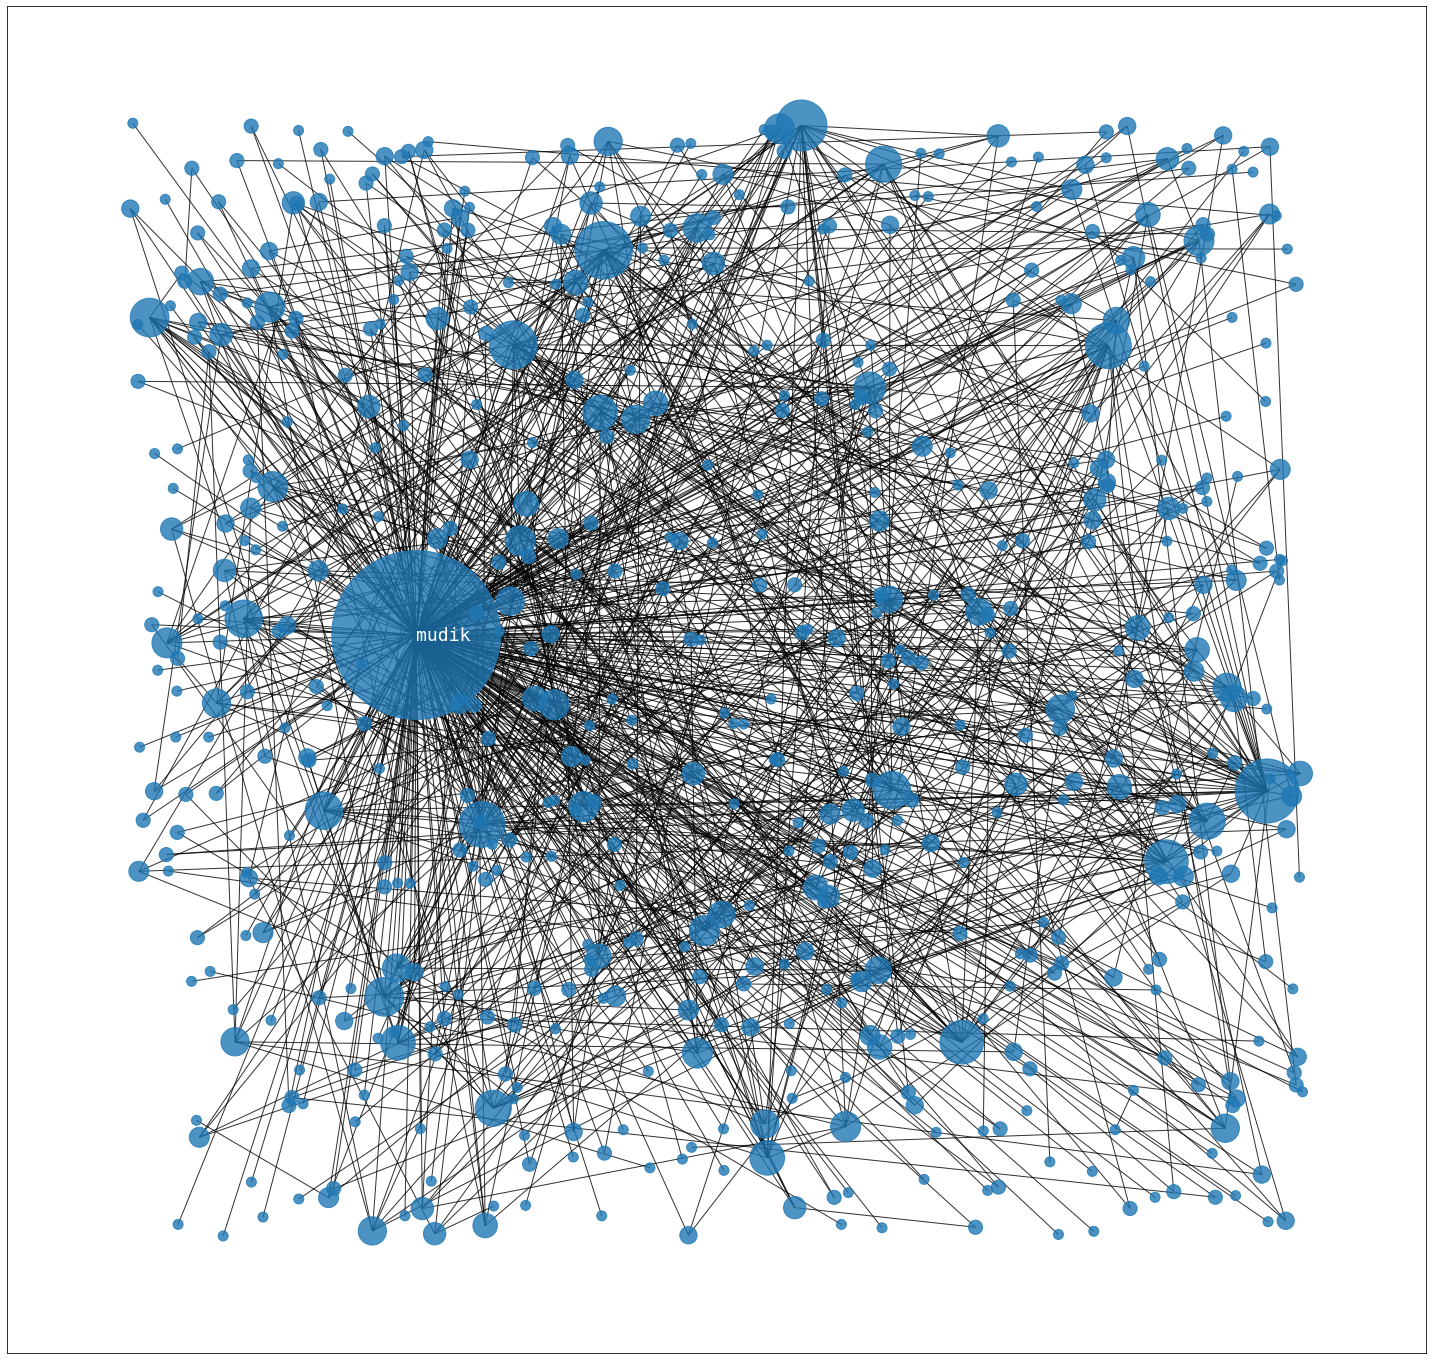

In [ ]:
plt.figure(figsize = (20,19))
l2 = nx.random_layout(G)
node_size = [100*G.degree(v) for v in G]

nx.draw_networkx(G, l2, with_labels = False, alpha = 0.8, node_size = node_size)
nx.draw_networkx_labels(G, l2, labels = {'mudik':'mudik'},
                         font_size = 18, horizontalalignment = 'left', font_family='monospace', font_color = 'white')
plt.tight_layout()
plt.savefig("G2 - kompleks.png", format="PNG")

Terdapat 1101 frasa yang dibentuk menjadi network. Secara umum, Kata "mudik" merupakan node yang paling penting dalam jaringan ini yang berarti kata "mudik" memiliki banyak hubungan dengan kata-kata lainnya. Hal ini sangat wajar mengingat saat melakukan penarikan data dengan scraping, kata "mudik" berperan sebagai keyword dalam mendapatkan data.

In [ ]:
centrality = nx.degree_centrality(G)
centrality = sorted(centrality.items(), key=operator.itemgetter(1))
centrality = pd.DataFrame(centrality, columns=['nodes', 'degree_centrality']).sort_values(ascending = False, by = 'degree_centrality')
centrality_top10 = centrality.head(10)

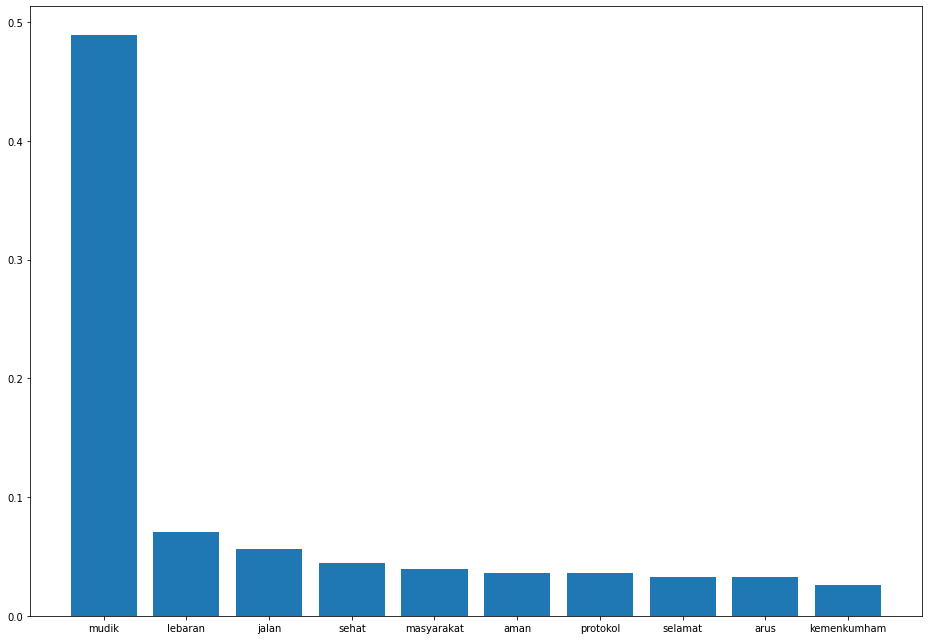

In [ ]:
f, ax = plt.subplots(1, 1, figsize = (13, 9))
plt.bar(centrality_top10['nodes'], centrality_top10['degree_centrality'])
plt.rc('xtick', labelsize = 12)
plt.rc('ytick', labelsize = 15)
plt.tight_layout()
plt.show()
f.savefig("G3 - Degree Centrality.png", format = 'PNG')

Selain kata "mudik", kata "lebaran" dan "jalan" memiliki nilai degree centrality yang lebih besar dibandingkat kata lainnya. Hal ini dapat kita artikan juga bahwa kata "lebaran" dan "jalan" juga merupakan node penting dalam network ini.


**Menggunakan Data yang Diseleksi**

In [ ]:
G_df_seleksi = G_df[G_df['Total'] > 1000]
G_df_seleksi.head()

,From,To,Total
0,protokol,sehat,12879.0
1,mudik,lebaran,11666.0
2,mudik,lancar,11529.0
3,arus,mudik,8232.0
4,sehat,mudik,7441.0


In [ ]:
G_df_from = G_df_seleksi['From'].to_list()
G_df_to = G_df_seleksi['To'].to_list()

In [ ]:
total_1gram = total_1gram.set_index('index')
total_1gram.head()

,Total
index,
mudik,177463.0
lebaran,25914.0
sehat,19658.0
jalan,17449.0
lancar,15402.0


In [ ]:
for i in total_1gram.index:
  if i in G_df_from or i in G_df_to:
    continue
  else:
    total_1gram = total_1gram.drop(i)

In [ ]:
total_1gram.head()

,Total
index,
mudik,177463.0
lebaran,25914.0
sehat,19658.0
jalan,17449.0
lancar,15402.0


In [ ]:
node_attr = total_1gram.to_dict()
node_attr = node_attr.get("Total")

In [ ]:
G_seleksi = nx.from_pandas_edgelist(G_df_seleksi, 'From', 'To', edge_attr ='Total')

In [ ]:
set_node_attributes(G, node_attr, 'total')

In [ ]:
node_attr.get('protokol')

12953.0

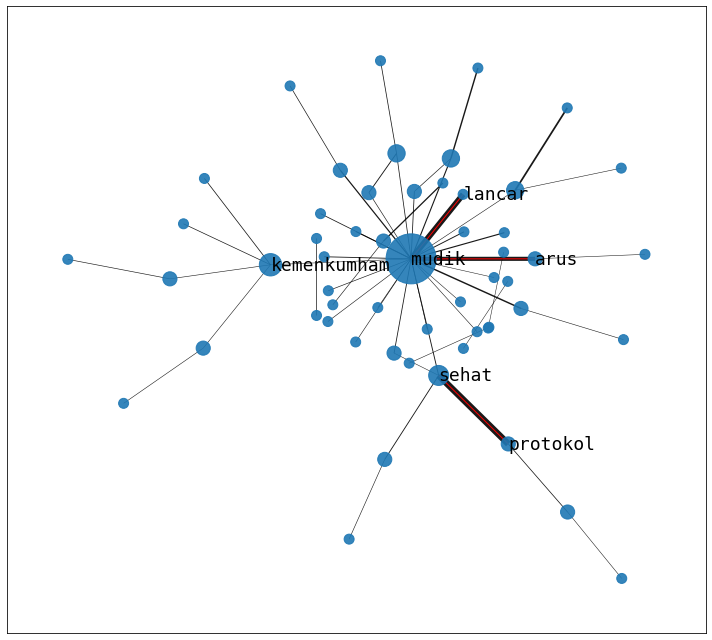

In [ ]:
plt.figure(figsize = (10,9))

node_size = [100*G_seleksi.degree(v) for v in G_seleksi]
#node_color = [0.05*nx.get_node_attributes(G_seleksi, 'total')[v] for v in G_seleksi]
edge_width = [0.0005*G_seleksi[u][v]['Total'] for u, v in G_seleksi.edges()]

l2 = nx.kamada_kawai_layout(G_seleksi)
nx.draw_networkx(G_seleksi, l2,  node_size = node_size, 
                 with_labels=False, width=edge_width, alpha = 0.9)

edge_greater_7000 = [x for x in G_seleksi.edges(data=True) if x[2]['Total'] > 7000]
nx.draw_networkx_edges(G_seleksi, l2, edgelist = edge_greater_7000, edge_color = 'red') 

nx.draw_networkx_labels(G, l2, labels = {'mudik':'mudik', 'lancar':'lancar', 'protokol':'protokol', 
                                         'sehat':'sehat', 'arus':'arus', 'kemenkumham' : 'kemenkumham'},
                         font_size = 18, horizontalalignment = 'left', font_family='monospace')
plt.tight_layout()

Berdasarkan network di atas, diketahui bahwa kata 'mudik' merupakan kata dengan degree tertinggi dan merupakan kata yang paling banyak digunakan dalam tweet.Kombinasi dua-kata yang sering digunakan dalam tweet adalah kata "protokol sehat", "arus mudik", dan "mudik lancar". Kata "kemenkumhan" cukup banyak terhubung dengan kata lainnya namun kombinasi kata dari "kemenkumhan" tidak terlalu sering digunakan dalam tweet. Selain kata "mudik", kata-kata lain digunakan dalam tweet dengan jumlah yang tidak jauh berbeda.